In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# For scaling the data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform PCA
from sklearn.decomposition import PCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
data = pd.read_csv('./viz/data_relationship.csv')
data

,country_id,level,factor,measure,factor_rank
0,139,weak-linear,hdi,0.00,4
1,193,mid-linear,hdi,-0.40,4
2,0,mid-linear,hdi,-0.63,2
3,96,mid-linear,hdi,0.34,3
4,148,weak-linear,hdi,-0.14,5
...,...,...,...,...,...
1444,124,weak-linear,unemployment,0.00,4
1445,161,weak-linear,unemployment,0.00,4
1446,26,weak-linear,unemployment,0.00,4
1447,83,weak-linear,unemployment,0.00,4


In [3]:
data = data.drop(['level','factor_rank'],axis=1)
data

,country_id,factor,measure
0,139,hdi,0.00
1,193,hdi,-0.40
2,0,hdi,-0.63
3,96,hdi,0.34
4,148,hdi,-0.14
...,...,...,...
1444,124,unemployment,0.00
1445,161,unemployment,0.00
1446,26,unemployment,0.00
1447,83,unemployment,0.00


In [4]:
country_id = pd.DataFrame(data.country_id.unique(),columns=['country_id'])

In [5]:
hdi = data[data['factor'] == 'hdi']
hdi = hdi.drop(['factor'],axis=1).rename(columns={'measure':'hdi'})

In [6]:
unemployment = data[data['factor'] == 'unemployment']
unemployment = unemployment.drop(['factor'],axis = 1).rename(columns={'measure':'unemployment'})

In [7]:
population = data[data['factor'] == 'population']
population = population.drop(['factor'],axis = 1).rename(columns={'measure':'population'})

In [8]:
gni = data[data['factor'] == 'gni']
gni = gni.drop(['factor'],axis = 1).rename(columns={'measure':'gni'})

In [9]:
gdp = data[data['factor'] == 'gdp']
gdp = gdp.drop(['factor'],axis = 1).rename(columns={'measure':'gdp'})

In [10]:
inflation = data[data['factor'] == 'inflation']
inflation = inflation.drop(['factor'],axis = 1).rename(columns={'measure':'inflation'})

In [11]:
infant_mortality = data[data['factor'] == 'infant_mortality']
infant_mortality = infant_mortality.drop(['factor'],axis = 1).rename(columns={'measure':'infant_mortality'})

In [12]:
Country_data = pd.merge(
    country_id,hdi,on='country_id').merge(
    unemployment,on='country_id').merge(
    population,on='country_id').merge(
    gdp,on='country_id').merge(
    gni,on='country_id').merge(
    inflation,on='country_id').merge(
    infant_mortality,on='country_id')

In [13]:
Country_data.head()

,country_id,hdi,unemployment,population,gdp,gni,inflation,infant_mortality
0,139,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,193,-0.40,-0.48,0.55,-0.31,-0.42,0.09,0.40
2,0,-0.63,-0.95,0.35,-0.09,-0.03,-0.40,0.08
3,96,0.34,0.48,0.68,0.03,0.12,0.00,0.25
4,148,-0.14,-0.92,-0.87,-0.14,-0.29,0.27,0.02


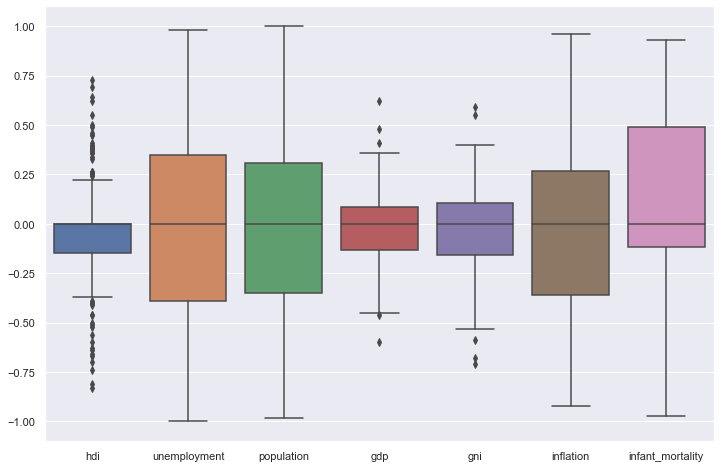

In [14]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=Country_data.drop(['country_id'],axis=1))
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
Country_data1=Country_data.drop('country_id',1) ## Droping string feature country name.
standard_scaler = StandardScaler()
Country_scaled = standard_scaler.fit_transform(Country_data1)

In [16]:
pca = PCA(svd_solver='randomized', random_state=42)


# fiting PCA on the dataset
pca.fit(Country_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [17]:
pca.components_

array([[ 0.44289395,  0.05144787,  0.32015656,  0.50435385,  0.48589525,
         0.30147155, -0.34255764],
       [ 0.3041364 ,  0.33297837,  0.32801479, -0.44914634, -0.50639834,
         0.37667801, -0.29828629],
       [ 0.04617624, -0.93021836,  0.25207762, -0.15607535, -0.1124978 ,
         0.14200218, -0.10880506],
       [-0.09950052,  0.02066941,  0.08361655,  0.10419066,  0.00377441,
         0.68213818,  0.71168691],
       [-0.25068257,  0.12117627,  0.84612222,  0.05116357,  0.00760791,
        -0.3897174 ,  0.22802741],
       [-0.79772368,  0.06163172,  0.04161883,  0.0614108 ,  0.07646025,
         0.35721307, -0.46998691],
       [-0.01041992, -0.04757037, -0.04142794,  0.70872459, -0.69920846,
        -0.04765121, -0.04958382]])

In [18]:
pca.explained_variance_ratio_

array([0.35998918, 0.18062052, 0.13859552, 0.12015874, 0.10715682,
       0.07435237, 0.01912684])

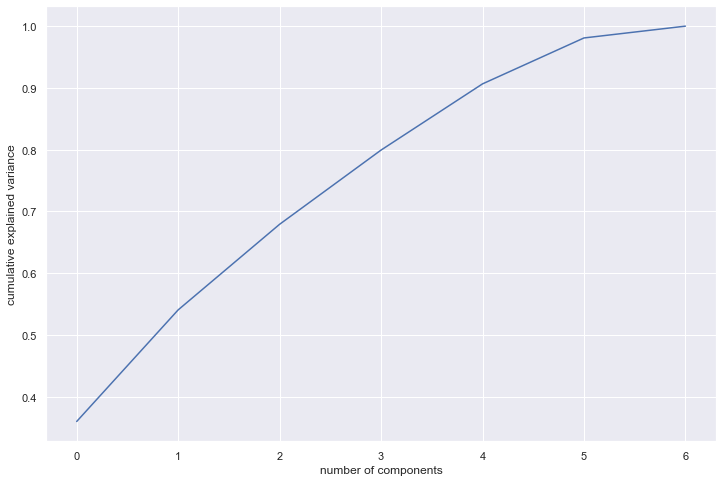

In [19]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [50]:
colnames = list(Country_data1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5
0,hdi,0.442894,0.304136,0.046176,-0.099501,-0.250683
1,unemployment,0.051448,0.332978,-0.930218,0.020669,0.121176
2,population,0.320157,0.328015,0.252078,0.083617,0.846122
3,gdp,0.504354,-0.449146,-0.156075,0.104191,0.051164
4,gni,0.485895,-0.506398,-0.112498,0.003774,0.007608
5,inflation,0.301472,0.376678,0.142002,0.682138,-0.389717
6,infant_mortality,-0.342558,-0.298286,-0.108805,0.711687,0.228027


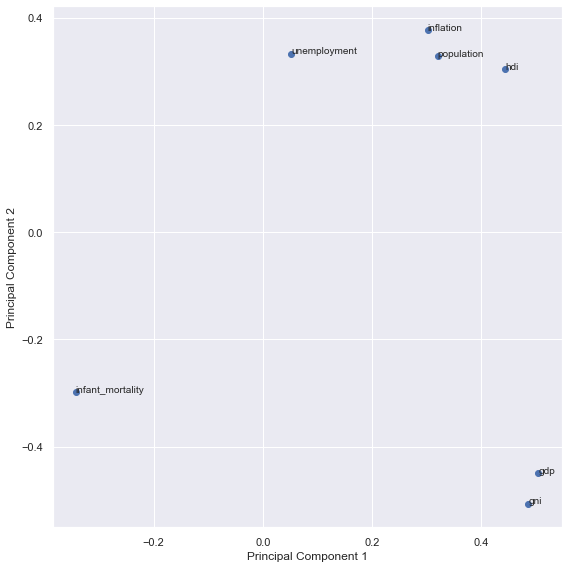

In [51]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [58]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)
df_pca = pca_final.fit_transform(Country_scaled)
df_pca.shape

(207, 5)

In [59]:
pc = np.transpose(df_pca)

In [60]:
corrmat = np.corrcoef(pc)

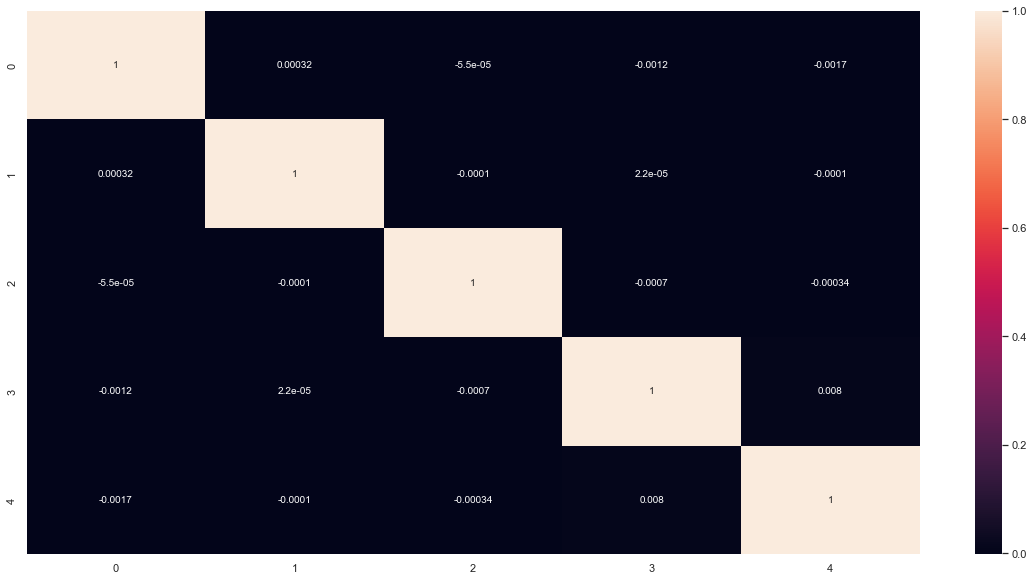

In [61]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [62]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

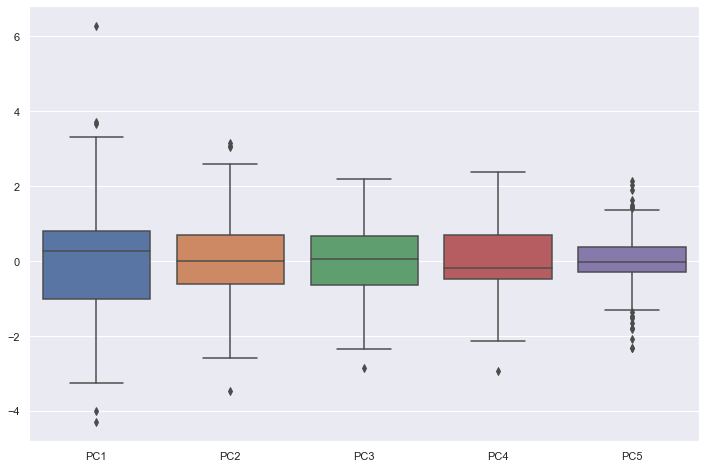

In [63]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

In [64]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,0.277559,0.009471,0.052608,-0.190275,-0.023511
1,-2.141753,-1.181366,-1.424373,1.215580,-0.682944
2,-1.320637,1.204735,-1.711477,0.368152,-1.530288
3,1.488848,-0.617153,0.612700,0.761155,0.969260
4,-1.455452,0.084861,-1.344597,-1.003289,-0.050325


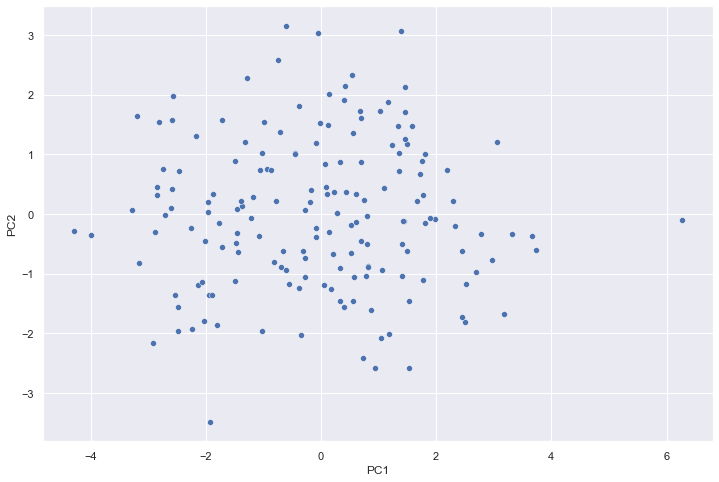

In [65]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

In [66]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [67]:
hopkins(pcs_df2)

0.7385661837575574

Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [68]:
from sklearn.metrics import silhouette_score
dat3_1 = pcs_df2
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])
    
sse_

[[2, 0.28962465347139354],
 [3, 0.23241698681910755],
 [4, 0.23238079183722582],
 [5, 0.24553446429911335],
 [6, 0.25353252347758193],
 [7, 0.25671019884766344],
 [8, 0.270265633889038],
 [9, 0.2705823686948325]]

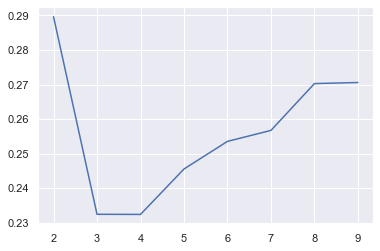

In [69]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

In [70]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)
ssd

[1260.576168793163,
 929.3400266630366,
 804.6645171783334,
 717.84215681541,
 655.2455604028576,
 607.2902201626447,
 559.898460555494,
 518.7764138862267,
 494.3100902385192]

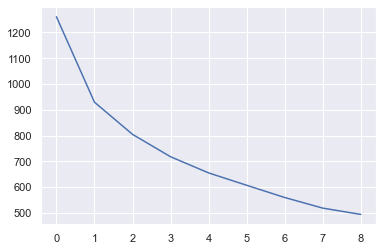

In [71]:
plt.plot(ssd)
plt.show()

In [72]:
ssd

[1260.576168793163,
 929.3400266630366,
 804.6645171783334,
 717.84215681541,
 655.2455604028576,
 607.2902201626447,
 559.898460555494,
 518.7764138862267,
 494.3100902385192]

In [73]:
model_clus2 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [74]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
dat_km

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,0.277559,0.009471,0.052608,-0.190275,-0.023511,0
1,-2.141753,-1.181366,-1.424373,1.215580,-0.682944,2
2,-1.320637,1.204735,-1.711477,0.368152,-1.530288,2
3,1.488848,-0.617153,0.612700,0.761155,0.969260,3
4,-1.455452,0.084861,-1.344597,-1.003289,-0.050325,2
...,...,...,...,...,...,...
202,0.277559,0.009471,0.052608,-0.190275,-0.023511,0
203,0.277559,0.009471,0.052608,-0.190275,-0.023511,0
204,0.277559,0.009471,0.052608,-0.190275,-0.023511,0
205,0.277559,0.009471,0.052608,-0.190275,-0.023511,0


In [75]:
dat_km['ClusterID'].value_counts()

0    81
2    49
3    42
1    35
Name: ClusterID, dtype: int64

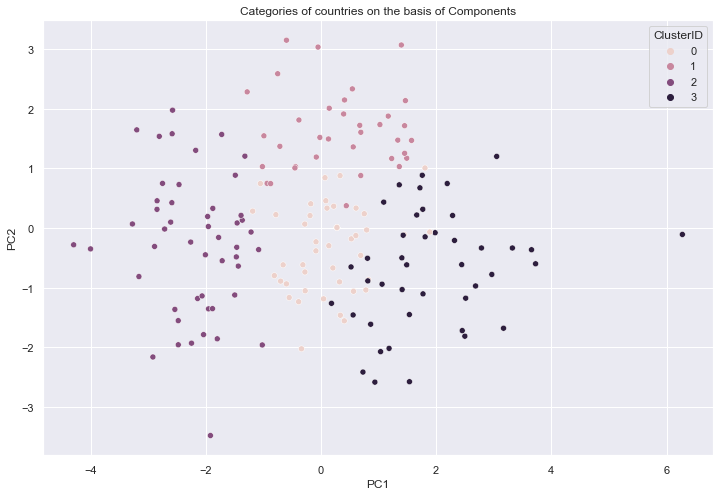

In [76]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories of countries on the basis of Components')
plt.show()

In [77]:
dat5=pd.merge(Country_data,dat_km, left_index=True,right_index=True)
dat5.head()

,country_id,hdi,unemployment,population,gdp,gni,inflation,infant_mortality,PC1,PC2,PC3,PC4,PC5,ClusterID
0,139,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.277559,0.009471,0.052608,-0.190275,-0.023511,0
1,193,-0.40,-0.48,0.55,-0.31,-0.42,0.09,0.40,-2.141753,-1.181366,-1.424373,1.215580,-0.682944,2
2,0,-0.63,-0.95,0.35,-0.09,-0.03,-0.40,0.08,-1.320637,1.204735,-1.711477,0.368152,-1.530288,2
3,96,0.34,0.48,0.68,0.03,0.12,0.00,0.25,1.488848,-0.617153,0.612700,0.761155,0.969260,3
4,148,-0.14,-0.92,-0.87,-0.14,-0.29,0.27,0.02,-1.455452,0.084861,-1.344597,-1.003289,-0.050325,2


In [78]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat6.head()

,country_id,hdi,unemployment,population,gdp,gni,inflation,infant_mortality,ClusterID
0,139,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1,193,-0.40,-0.48,0.55,-0.31,-0.42,0.09,0.40,2
2,0,-0.63,-0.95,0.35,-0.09,-0.03,-0.40,0.08,2
3,96,0.34,0.48,0.68,0.03,0.12,0.00,0.25,3
4,148,-0.14,-0.92,-0.87,-0.14,-0.29,0.27,0.02,2


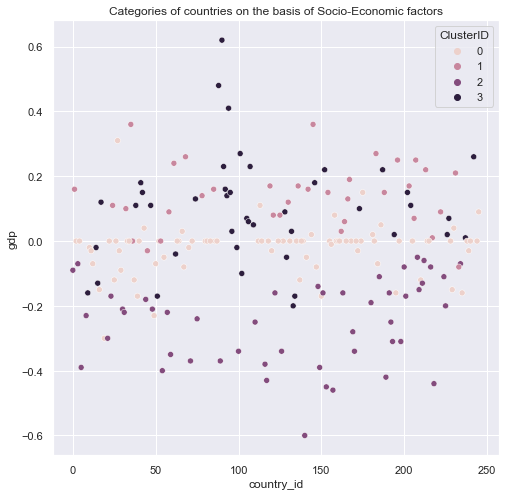

In [81]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x='country_id',y='gdp',hue='ClusterID',legend='full',data=dat6)

plt.title('Categories of countries on the basis of Socio-Economic factors')
plt.show()

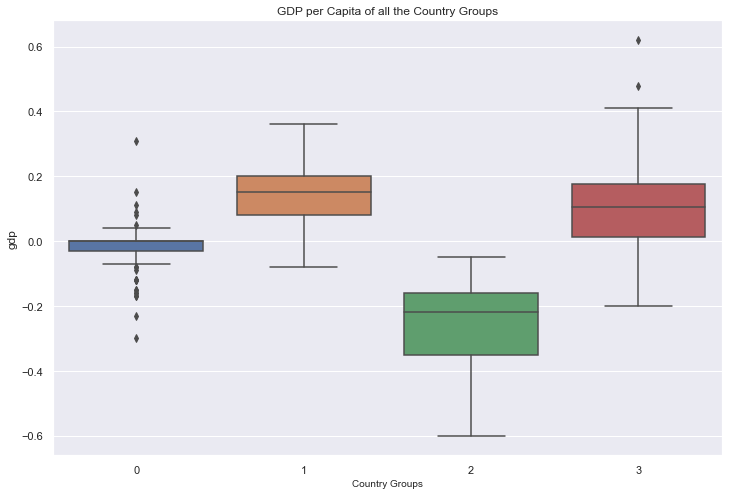

In [85]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='gdp',data=dat6)
plt.xlabel('Country Groups', fontsize=10)
plt.title('GDP per Capita of all the Country Groups')
plt.show()

In [84]:
dat6.to_csv("data-clustering.csv",index=False)